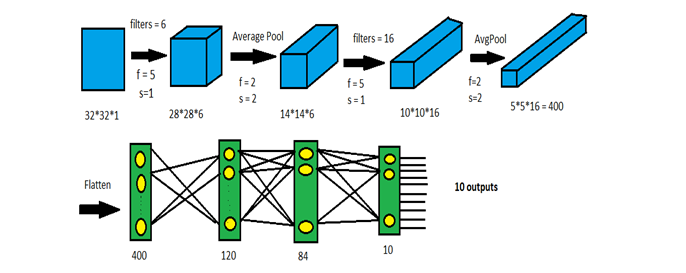

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from keras import Sequential
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) =mnist.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
x_train =x_train.astype('float32')
x_test =x_test.astype('float32')

# Normalization
x_train /=255
x_test = x_test/255

In [4]:
# Reshape the dataset into 4D array

x_train =x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [5]:
import numpy as np
from tensorflow.python.keras.utils import np_utils

In [6]:
y_train = np_utils.to_categorical(y_train,10)
y_test =np_utils.to_categorical(y_test,10)

In [7]:
model =Sequential()

# Convolution Layer 1
model.add(Conv2D(6,kernel_size =(5,5),strides =1,padding ='valid',activation ='relu',input_shape =(28,28,1))) #vaild =0

# Convolution Layer 2
model.add(Conv2D(16,kernel_size=(5,5),strides=1,padding ='valid',activation ='relu')) # instead of tanh, we are using relu

#Avg pooling -replace with max pooling
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding ='valid'))  #poo1 =filter

#Flatten : 2D to 1D
model.add(Flatten())

#Fully Connected Layer 1
model.add(Dense(120, activation ='relu'))

#Fully Connected Layer 2
model.add(Dense(84, activation ='relu'))

#Output Layer
model.add(Dense(10,activation ='softmax'))

#summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 16)        2416      
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 120)               192120    
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                        

In [8]:
model.compile(optimizer='Adam',loss= keras.losses.categorical_crossentropy, metrics =['accuracy'])

In [9]:
history =model.fit(x_train,y_train,epochs =5,batch_size =64,validation_data =(x_test,y_test))

Epoch 1/5
938/938 [==============================] - 23s 7ms/step - loss: 0.1771 - accuracy: 0.9464 - val_loss: 0.0587 - val_accuracy: 0.9819
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0557 - accuracy: 0.9825 - val_loss: 0.0610 - val_accuracy: 0.9802
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0420 - val_accuracy: 0.9872
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0354 - val_accuracy: 0.9881
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0399 - val_accuracy: 0.9868


# AlexNet 8 Architecture

In [10]:
# CIFAR 10 Dataset

In [11]:
(x_train,y_train),(x_test,y_test) =keras.datasets.cifar10.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [12]:
x_train, x_test = x_train/255.0, x_test/255.0

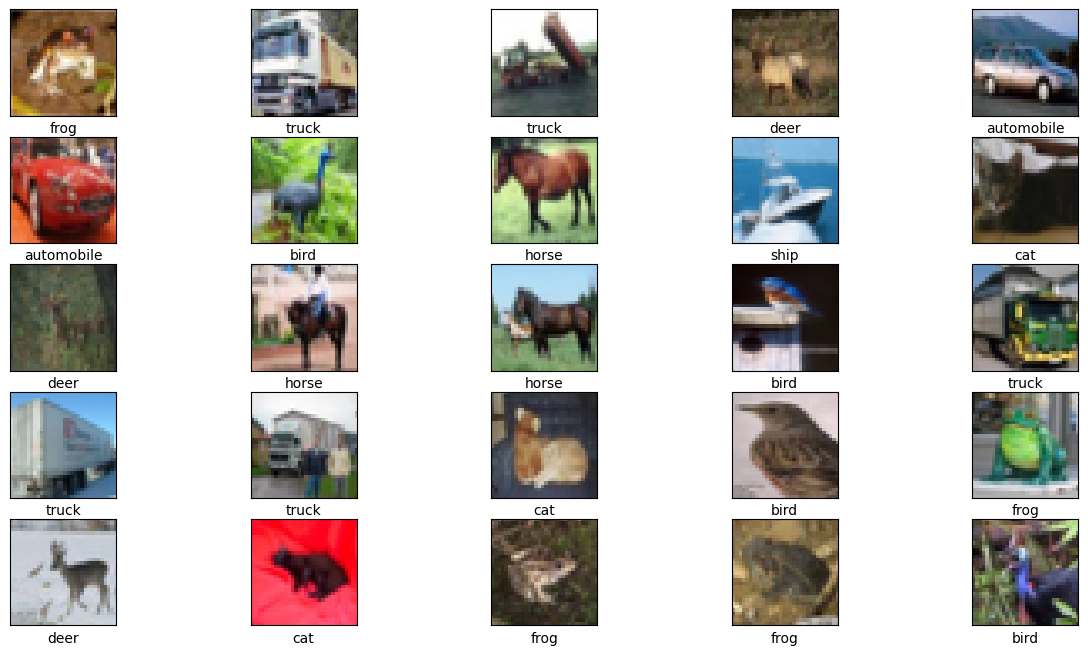

In [14]:
"""
Label	Description
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck
"""
class_name =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

import matplotlib.pyplot as plt
plt.figure(figsize =(15,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i],cmap = plt.cm.binary)
  plt.xlabel(class_name[y_train[i][0]])
plt.show()



![image.png](""')

In [22]:
"""
#AlexNet -8

model =Sequential()
#Conv1
model.add(Conv2D(96,kernel_size=(11,11),strides=4,padding='valid',activation ='relu',input_shape=(32,32,3)))

#Max Pooling
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding ='valid'))

#Conv2
model.add(Conv2D(256,kernel_size=(5,5),strides=1,padding='same',activation ='relu'))

#Max Pooling 2
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding ='valid'))

#Conv3
model.add(Conv2D(384,kernel_size=(3,3),strides=1,padding='same',activation ='relu'))

#Conv4
model.add(Conv2D(384,kernel_size=(3,3),strides=1,padding='same',activation ='relu'))

#Conv5
model.add(Conv2D(256,kernel_size=(3,3),strides=1,padding='same',activation ='relu'))

#Max Pooling 3
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding ='valid'))

#Flatten
model.add(Flatten())

#Fully Connected Layer1 -6
model.add(Dense(4096,activation ='relu'))

#Fully Connected Layer2 -7
model.add(Dense(4096,activation ='relu'))

#Output Layer -8
model.add(Dense(10,activation ='softmax'))

#Summary
model.summary()

# some issue with code, so that's why modified code in the below
"""

"\n#AlexNet -8\n\nmodel =Sequential()\n#Conv1\nmodel.add(Conv2D(96,kernel_size=(11,11),strides=4,padding='valid',activation ='relu',input_shape=(32,32,3)))\n\n#Max Pooling\nmodel.add(MaxPooling2D(pool_size=(3,3),strides=2,padding ='valid'))\n\n#Conv2\nmodel.add(Conv2D(256,kernel_size=(5,5),strides=1,padding='same',activation ='relu'))\n\n#Max Pooling 2\nmodel.add(MaxPooling2D(pool_size=(3,3),strides=2,padding ='valid'))\n\n#Conv3\nmodel.add(Conv2D(384,kernel_size=(3,3),strides=1,padding='same',activation ='relu'))\n\n#Conv4\nmodel.add(Conv2D(384,kernel_size=(3,3),strides=1,padding='same',activation ='relu'))\n\n#Conv5\nmodel.add(Conv2D(256,kernel_size=(3,3),strides=1,padding='same',activation ='relu'))\n\n#Max Pooling 3\nmodel.add(MaxPooling2D(pool_size=(3,3),strides=2,padding ='valid'))\n\n#Flatten\nmodel.add(Flatten())\n\n#Fully Connected Layer1 -6\nmodel.add(Dense(4096,activation ='relu'))\n\n#Fully Connected Layer2 -7\nmodel.add(Dense(4096,activation ='relu'))\n\n#Output Layer -8\n

In [33]:


model =Sequential()
#Conv1
model.add(Conv2D(32,kernel_size=(3,3),strides=2,padding='valid',activation ='relu',input_shape=(32,32,3)))
# padding ='same' (1),padding ='valid'(0 )

#Max Pooling
model.add(MaxPooling2D(pool_size=(2,2),padding ='valid'))

#Conv2
model.add(Conv2D(64,kernel_size=(3,3),strides=1,padding='same',activation ='relu'))

#Flatten
model.add(Flatten())

#Fully Connected Layer1 -6
model.add(Dense(64,activation ='relu'))

#Output Layer -8
model.add(Dense(10,activation ='softmax'))

#Summary
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 15, 15, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_13 (Dense)            (None, 64)                200768    
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                     

In [34]:
model.compile(optimizer ='Adam',loss =keras.losses.SparseCategoricalCrossentropy(from_logits =True),metrics =['accuracy'])

In [35]:
model.fit(x_train,y_train,batch_size =64,epochs =10,validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 6s 6ms/step - loss: 1.5532 - accuracy: 0.4398 - val_loss: 1.3268 - val_accuracy: 0.5142
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 1.1946 - accuracy: 0.5798 - val_loss: 1.0976 - val_accuracy: 0.6164
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 1.0631 - accuracy: 0.6290 - val_loss: 1.0383 - val_accuracy: 0.6391
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9714 - accuracy: 0.6623 - val_loss: 0.9849 - val_accuracy: 0.6578
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.9045 - accuracy: 0.6862 - val_loss: 0.9659 - val_accuracy: 0.6646
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.8424 - accuracy: 0.7063 - val_loss: 0.9609 - val_accuracy: 0.6707
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.7868 - accuracy: 0.7275 - val_loss: 0.9298 - val_accuracy: 0.6790
Epoch 